In [18]:
import os
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

# loading data(segemented data are in 6 folders, with folder names as the labels)
data_dir = r'DATA_BEAR_3D' # 6 folders with 3D data
classes = os.listdir(data_dir)
num_classes = len(classes)

data = []
labels = []

for i, class_name in enumerate(classes):
    class_dir = os.path.join(data_dir, class_name)
    for npy_file in os.listdir(class_dir):
        npy_path = os.path.join(class_dir, npy_file)
        data.append(np.load(npy_path))
        labels.append(i)  # assigning labels

data = np.array(data)
labels = np.array(labels)

# spliting dataset
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.2, random_state=42)

# 3D-CNN
model = tf.keras.Sequential([
    tf.keras.layers.Conv3D(32, (3, 3, 3), activation='relu', padding='same', input_shape=(601, 12, 6, 1)),
    tf.keras.layers.Conv3D(64, (3, 3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling3D((2, 2, 2)),
    tf.keras.layers.Conv3D(128, (3, 3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv3D(128, (3, 3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling3D((2, 2, 2)),
    tf.keras.layers.Conv3D(256, (3, 3, 3), activation='relu', padding='same'),
    tf.keras.layers.GlobalAveragePooling3D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# training model
history = model.fit(train_data, train_labels, epochs=50, validation_split=0.1)

# evaluating model
test_loss, test_accuracy = model.evaluate(test_data, test_labels)
print(f'Test accuracy: {test_accuracy}')


Epoch 1/50
14/14 [==============================] - 3s 64ms/step - loss: 1.6422 - accuracy: 0.2339 - val_loss: 1.1347 - val_accuracy: 0.4286
Epoch 2/50
14/14 [==============================] - 1s 51ms/step - loss: 1.2627 - accuracy: 0.3601 - val_loss: 1.1015 - val_accuracy: 0.4082
Epoch 3/50
14/14 [==============================] - 1s 50ms/step - loss: 1.0947 - accuracy: 0.4817 - val_loss: 0.9382 - val_accuracy: 0.4898
Epoch 4/50
14/14 [==============================] - 1s 51ms/step - loss: 0.8924 - accuracy: 0.5183 - val_loss: 0.6712 - val_accuracy: 0.6531
Epoch 5/50
14/14 [==============================] - 1s 51ms/step - loss: 0.8345 - accuracy: 0.5849 - val_loss: 0.8262 - val_accuracy: 0.5918
Epoch 6/50
14/14 [==============================] - 1s 50ms/step - loss: 0.9325 - accuracy: 0.5367 - val_loss: 0.7603 - val_accuracy: 0.6327
Epoch 7/50
14/14 [==============================] - 1s 50ms/step - loss: 0.8208 - accuracy: 0.5161 - val_loss: 0.6659 - val_accuracy: 0.7347
Epoch 8/50
14

4/4 [==============================] - 0s 14ms/step


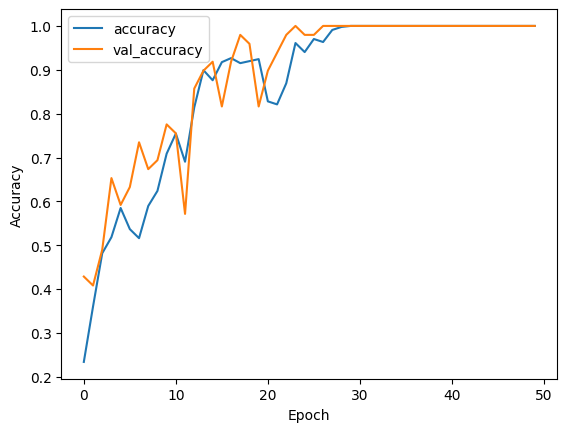

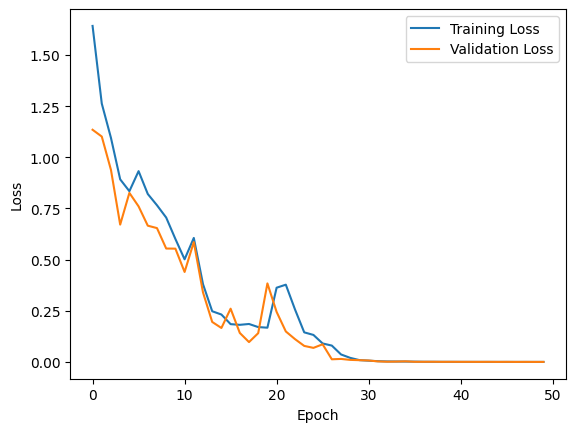

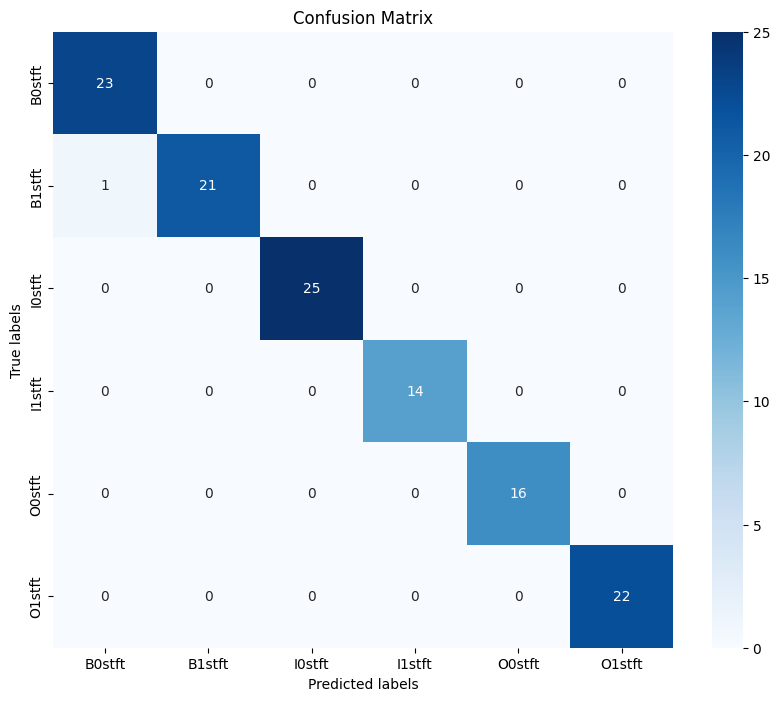

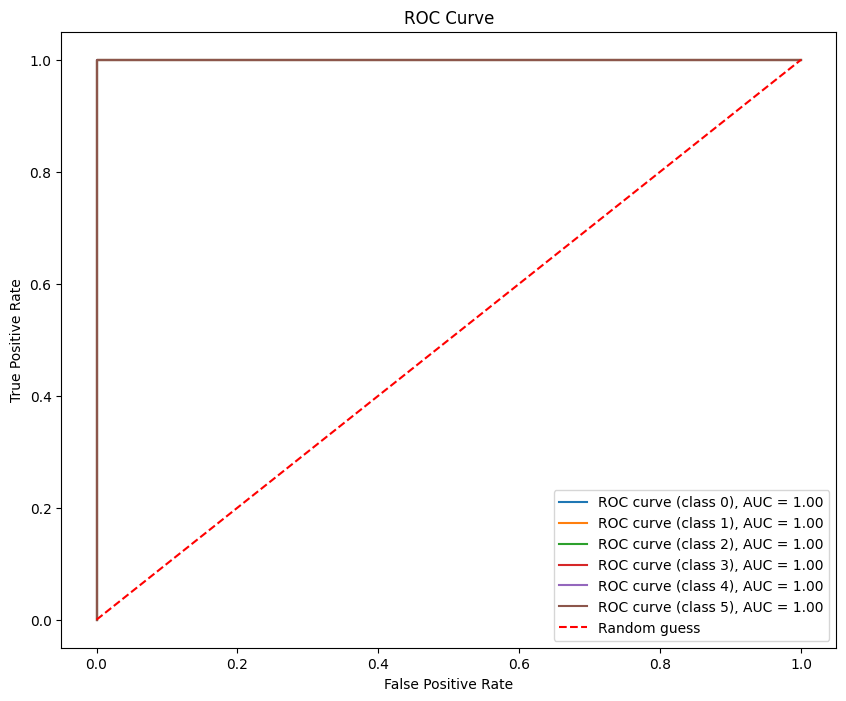

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc
import seaborn as sns


y_pred = model.predict(test_data)
y_pred_classes = np.argmax(y_pred, axis=1)

# training curve
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# loss curve
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


# confusion matrix
cm = confusion_matrix(test_labels, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# ROC curve
plt.figure(figsize=(10, 8))
for i in range(num_classes):
    fpr, tpr, _ = roc_curve(test_labels, y_pred[:, i], pos_label=i)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'ROC curve (class {i}), AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()
